# Random Forest

# 1. Exploratory Data Analysis (EDA):

#  Data Preprocessing

In [1]:
import pandas as pd

In [2]:
df_sheets = pd.read_excel("glass.xlsx", sheet_name=None, engine="openpyxl")  
df_sheets.keys()

dict_keys(['Description', 'glass'])

In [5]:

Data = pd.read_excel("glass.xlsx", sheet_name="glass", engine="openpyxl")
Data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [37]:
Data.shape

(214, 10)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
Data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
Data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2: Data Visualization:

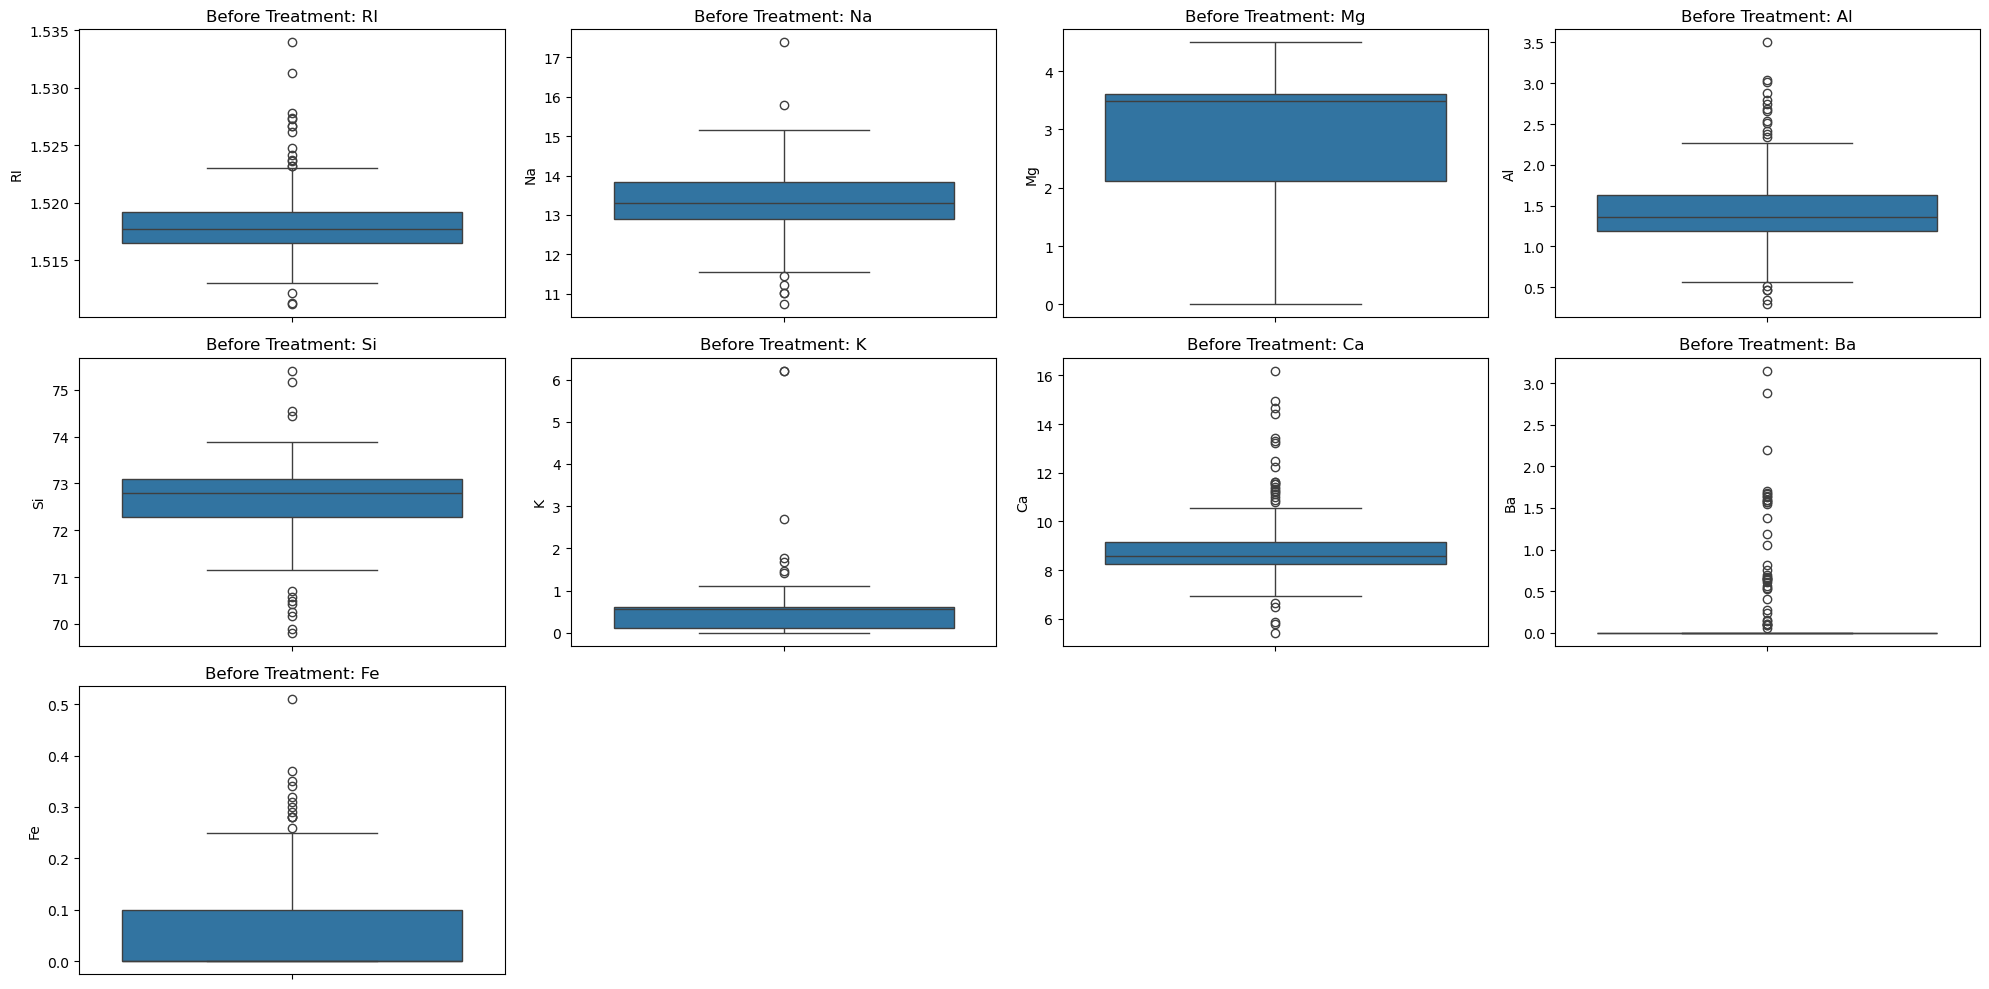

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ['RI', 'Na', 'Mg',  'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Function to detect and treat outliers using IQR
def treat_outliers_iqr(Data, column):
    Q1 = Data[column].quantile(0.25)
    Q3 = Data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    Data[column] = np.where(Data[column] < lower_bound, lower_bound, Data[column])
    Data[column] = np.where(Data[column] > upper_bound, upper_bound, Data[column])
    return Data

# Visualize outliers before treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data[col])
    plt.title(f'Before Treatment: {col}')
plt.tight_layout()
plt.show()


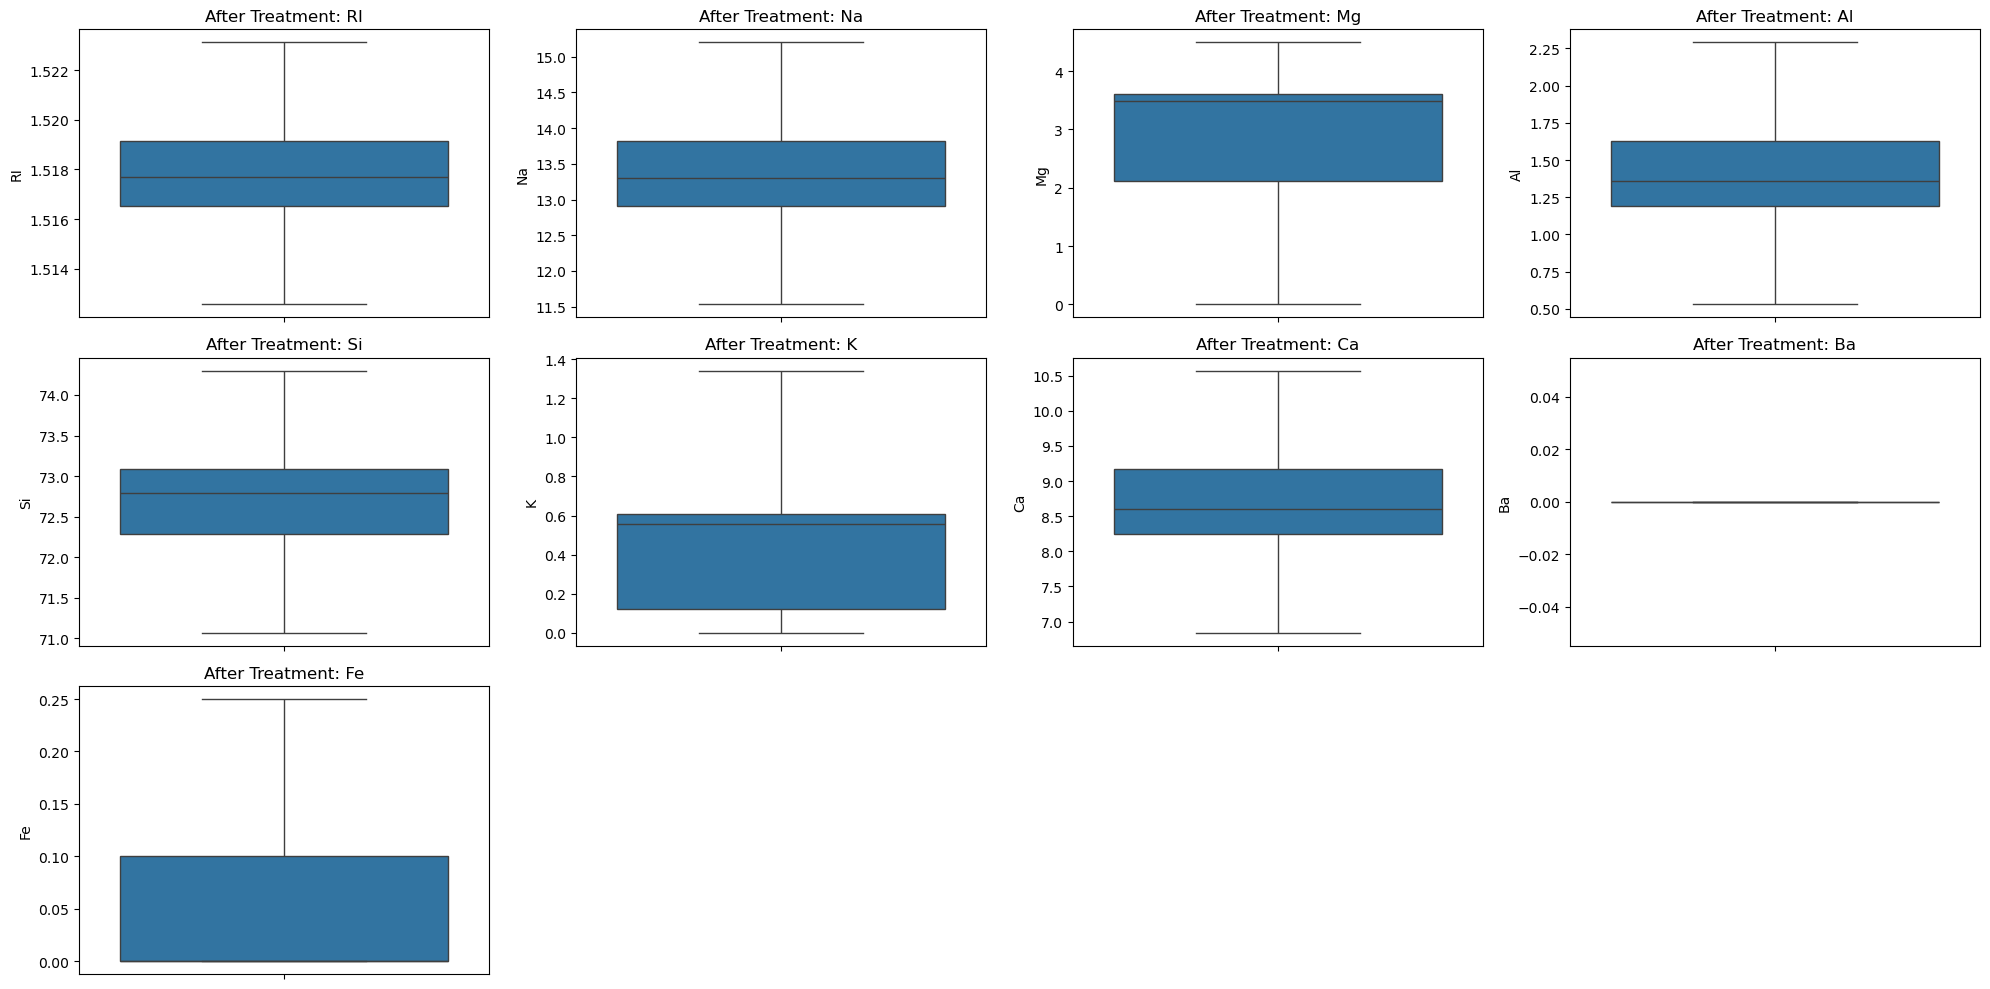

In [23]:
#Treat outliers for all numerical columns
for col in numerical_cols:
    Data = treat_outliers_iqr(Data, col)

# Visualize outliers after treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data[col])
    plt.title(f'After Treatment: {col}')
plt.tight_layout()
plt.show()


In [27]:
Data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

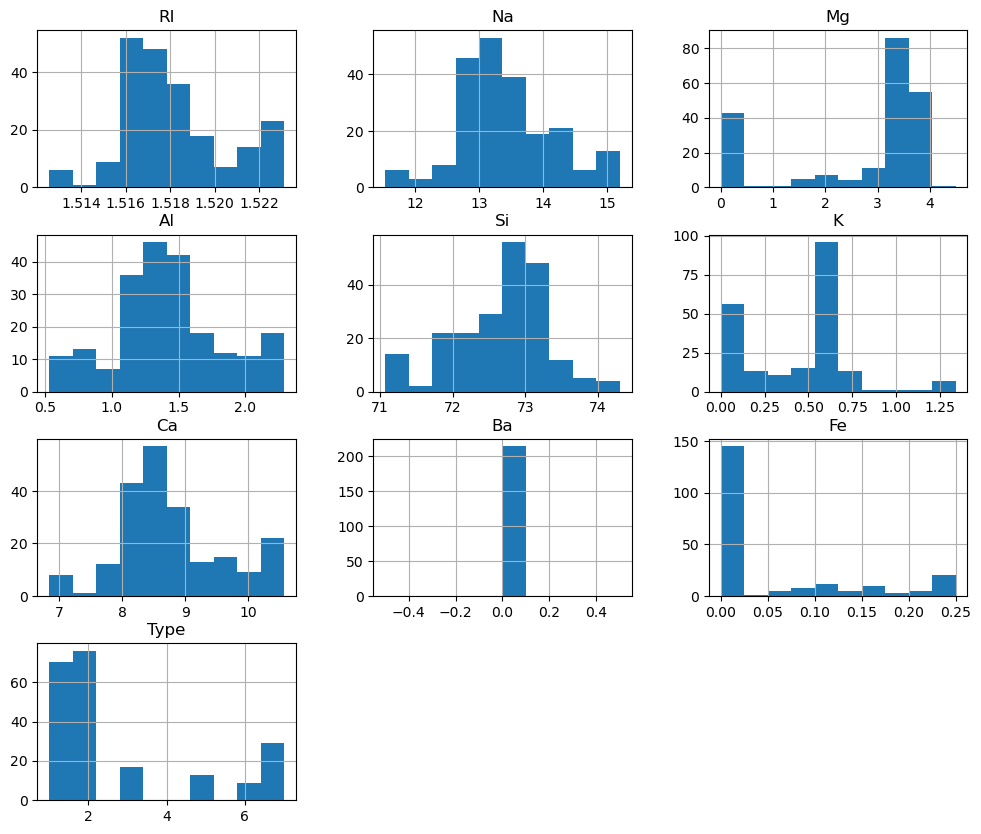

In [29]:
Data.hist(figsize=(12, 10))
plt.show()

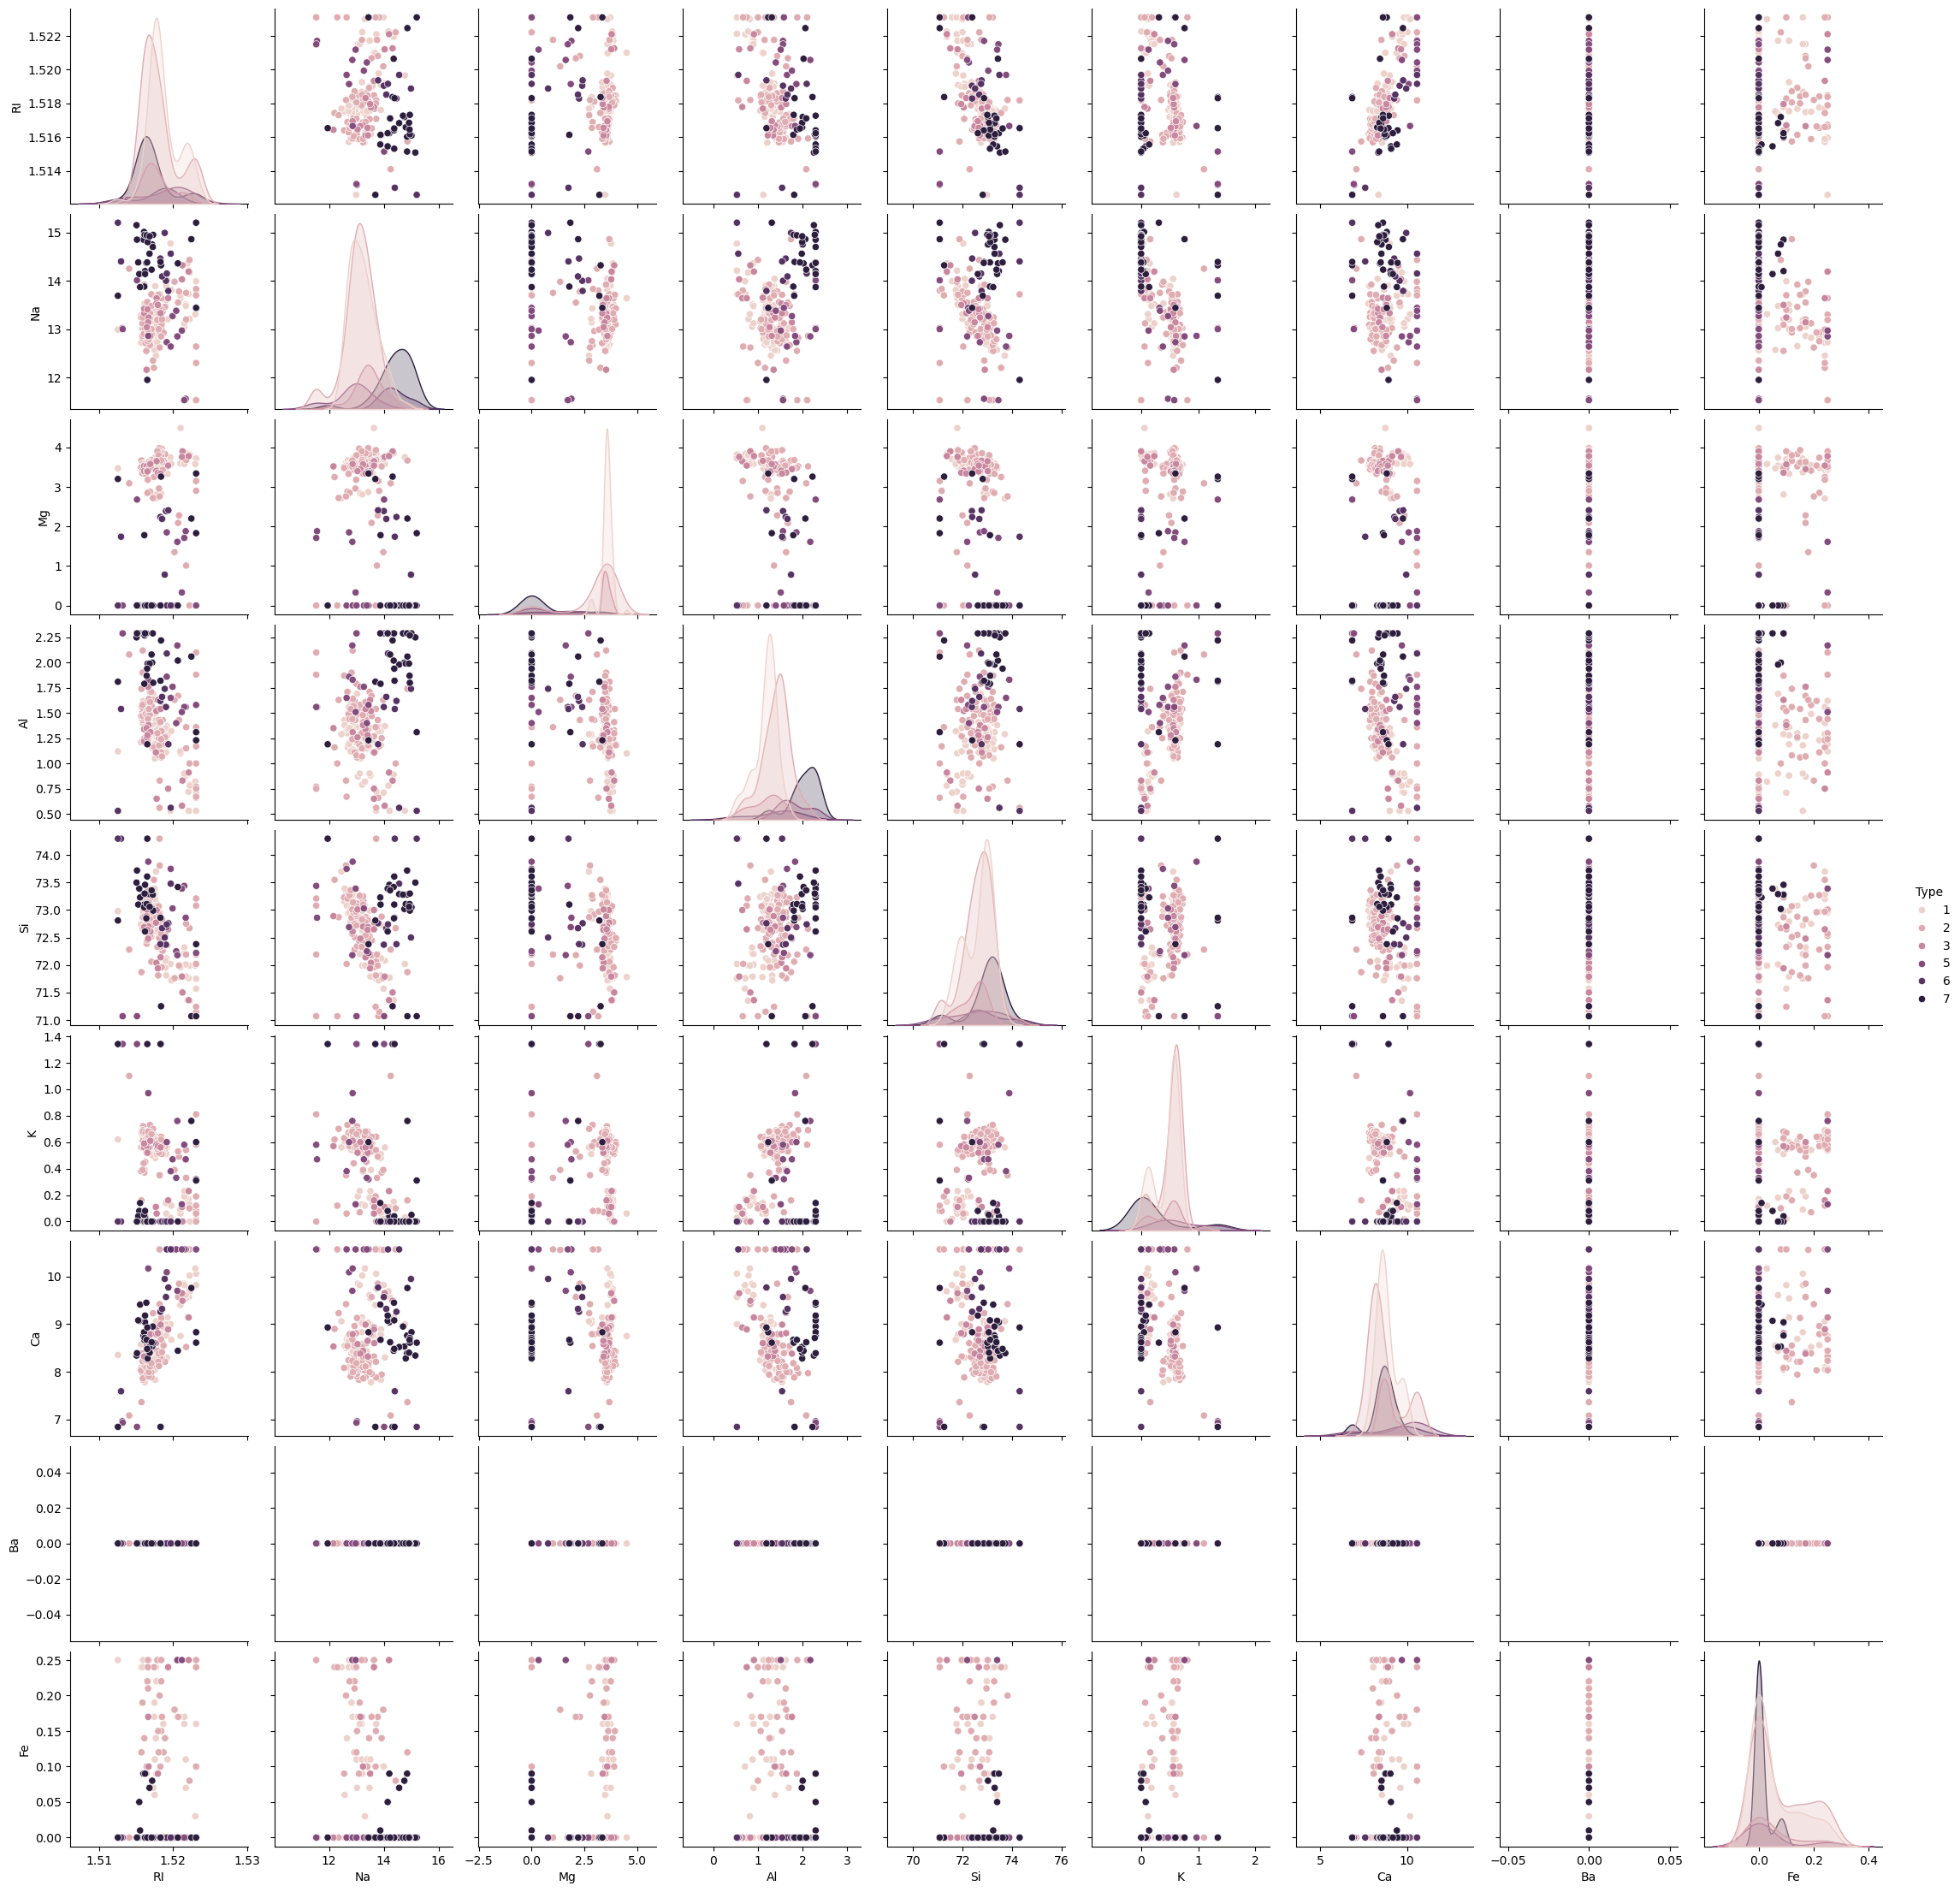

In [31]:
sns.pairplot(Data, hue='Type')
plt.show()

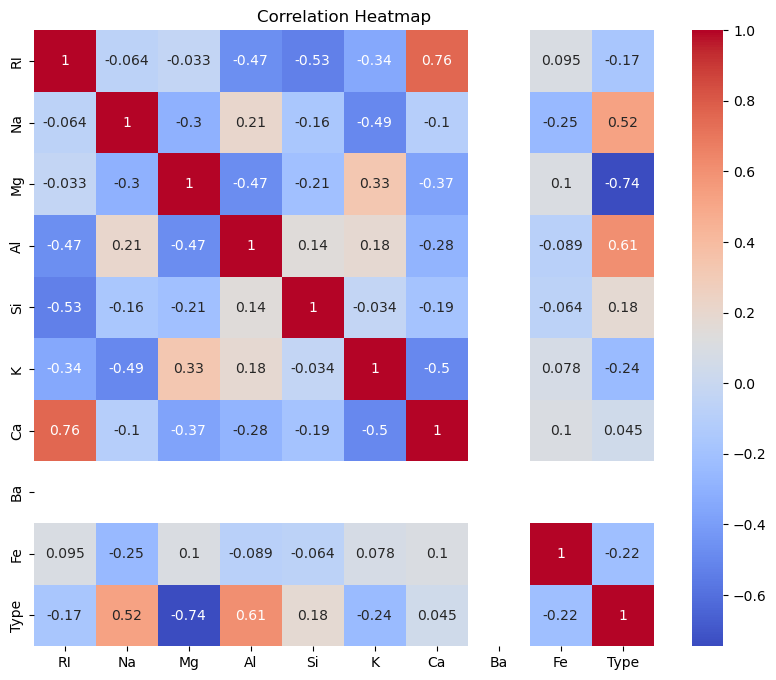

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

X = Data.drop(columns=['Type'])
y = Data['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:

y.value_counts()

#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [ ]:
# 4: Random Forest Model Implementation

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8686131386861314
Precision: 0.8860678503648989
Recall: 0.8686131386861314
F1-Score: 0.8673870638662394
Confusion Matrix:
 [[18  4  8  0  0  0]
 [ 2 21  1  0  0  1]
 [ 0  0 14  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0 23  0]
 [ 1  1  0  0  0 26]]
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.60      0.71        30
           2       0.81      0.84      0.82        25
           3       0.61      1.00      0.76        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       0.96      0.93      0.95        28

    accuracy                           0.87       137
   macro avg       0.87      0.89      0.87       137
weighted avg       0.89      0.87      0.87       137



In [61]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Accuracy: 0.8175182481751825


In [59]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
boosting_model = AdaBoostClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

# Evaluate Boosting
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boosting))

Boosting Accuracy: 0.34306569343065696


In [ ]:
Comparison
Bagging: Reduces variance and overfitting by averaging multiple models.

Boosting: Reduces bias by focusing on correcting errors from previous models.
